In [42]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import float64
import pandas as pd


class Translator:
    def __init__(self, xdata, ydata):
        self.xdata = xdata
        self.ydata = ydata
        self._popt, pcov = curve_fit(self.func, self.xdata, self.ydata)

    def freq2digits(self, freq):
        return self.counter_func(freq, *self._popt)

    @staticmethod
    def func(x, m, t):
        return m * x + t

    @staticmethod
    def counter_func(y, m, t):
        return (y-t)/m

    @property
    def popt(self):
        return self._popt
    
    def print_func(self):
        return f"y = f(x) = {self._popt[0]}*x + {self._popt[1]}"

    def plot_data_against_approximation(self):
        plt.plot(self.xdata, self.func(float64(self.xdata), *self._popt), 'r', label='approximation')
        plt.plot(self.xdata, self.ydata, 'b-', label='data')
        plt.legend()

In [43]:
df = pd.read_csv("adc.raw")

In [44]:
df.head()

,voltage,adc_raw
0,0.0,19
1,0.2,63
2,0.4,105
3,0.6,152
4,0.8,196


In [45]:
xdata = df["adc_raw"].to_list()
ydata = df["voltage"].to_list()
t = Translator(xdata, ydata)

In [46]:
t.print_func()

'y = f(x) = 0.004556406962632479*x + -0.08625346649966133'

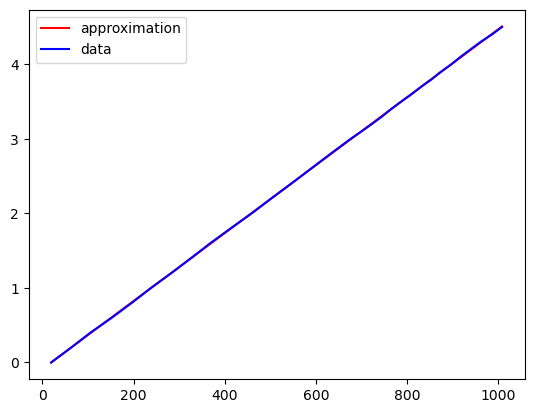

In [34]:
t.plot_data_against_approximation()